<a href="https://colab.research.google.com/github/LatiefDataVisionary/multivariate-analysis-college-task/blob/main/src/KMeans_w11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [23]:
import pandas as pd
import numpy as np
import kagglehub
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

**1. Load Dataset**

In [24]:
path = kagglehub.dataset_download('whenamancodes/predict-diabities')
print(f"Konten/dataset dari downloaded directory '{path}':")
for item in os.listdir(path):
    print(item)

csv_file_path = os.path.join(path, 'diabetes.csv')

Konten/dataset dari downloaded directory '/kaggle/input/predict-diabities':
diabetes.csv


In [25]:
df = pd.read_csv(csv_file_path, usecols=['BloodPressure', 'Age'])
df.head()

,BloodPressure,Age
0,72,50
1,66,31
2,64,32
3,66,21
4,40,33


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   BloodPressure  768 non-null    int64
 1   Age            768 non-null    int64
dtypes: int64(2)
memory usage: 12.1 KB


In [28]:
df.describe()

,BloodPressure,Age
count,768.000000,768.000000
mean,69.105469,33.240885
std,19.355807,11.760232
min,0.000000,21.000000
25%,62.000000,24.000000
50%,72.000000,29.000000
75%,80.000000,41.000000
max,122.000000,81.000000


**2. Data Preprocessing**

Cek missing Values

In [29]:
df.isnull().sum()

,0
BloodPressure,0
Age,0


Standarisasi data

In [30]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['BloodPressure', 'Age']])

**3. Menentukan Jumlah Klaster Optimal (Elbow Metthod) secara otomatis**

  - Menghitung SSE (Sum of Squared Errors) untuk k=1 hingga 7
  - Mendeteksi titik siku secara otomatis

In [36]:
sse = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Deteksi siku otomatis berdasarkan penurunan SSE
k_diff = np.diff(sse)
k_optimal = np.argmax(k_diff < 0.5 * k_diff[0]) + 2 if any(k_diff < 0.5 * k_diff[0]) else 3

**4. K-Means clustering**

  - Membuat model dengan k optimal
  - Menambahkan label klaster ke dataset

In [32]:
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

**5. Menghitung statistik per klaster**

- Jumlah pasien, rata-rata usia, rata-rata tekanan darah

In [33]:
cluster_stats = df.groupby('Cluster').agg(
    Patients=('Age', 'count'),
    Avg_Age=('Age', 'mean'),
    Avg_BP=('BloodPressure', 'mean'),
    BP_Std=('BloodPressure', 'std')
).reset_index()

**6. Visualize results**


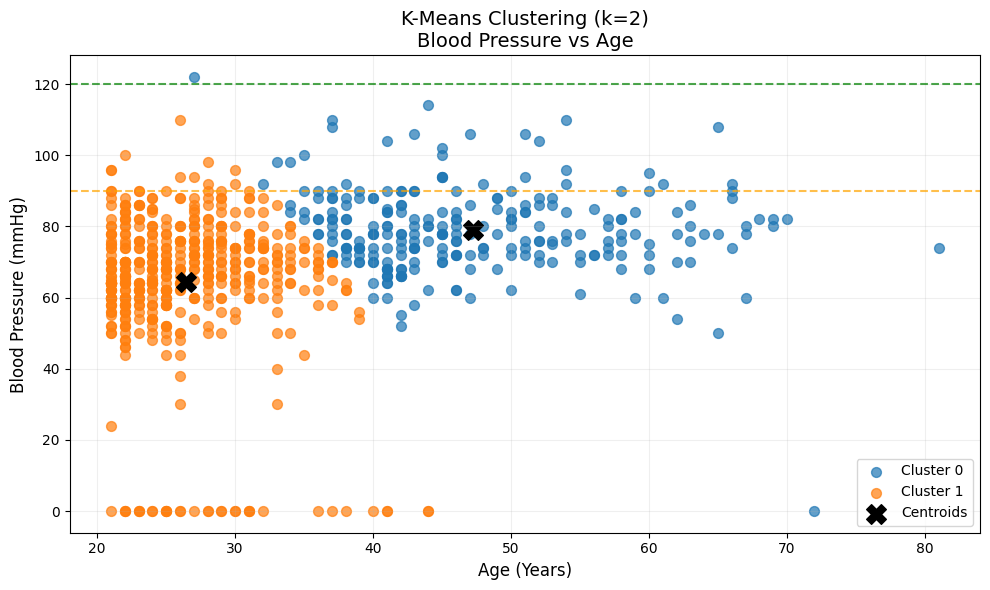

In [35]:
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Scatter plot
for i in range(k_optimal):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Age'], cluster_data['BloodPressure'],
                color=colors[i], alpha=0.7, s=50, label=f'Cluster {i}')

# Centroids
plt.scatter(centroids[:, 1], centroids[:, 0], marker='X', s=200,
            color='black', label='Centroids')

# Reference lines
plt.axhline(90, color='orange', linestyle='--', alpha=0.7)
plt.axhline(120, color='green', linestyle='--', alpha=0.7)

# Formatting
plt.title(f'K-Means Clustering (k={k_optimal})\nBlood Pressure vs Age', fontsize=14)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Blood Pressure (mmHg)', fontsize=12)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig('clustering_result.png', dpi=300)

**7. Print report**
